In [1]:
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
b= df.groupby('sex')
b

In [7]:
b.first()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,10.34,1.66,No,Sun,Dinner,3
Female,16.99,1.01,No,Sun,Dinner,2


In [10]:
df.groupby('sex').ngroups

2

In [12]:
df.groupby('sex').groups

{'Male': [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 88, 89, 90, 91, 95, 96, 97, 98, 99, 105, 106, 107, 108, 110, 112, 113, 116, 120, 122, 123, 126, 129, 130, 138, 141, 142, 148, 149, 150, 151, 152, 153, 154, 156, 159, ...], 'Female': [0, 4, 11, 14, 16, 18, 21, 22, 29, 32, 33, 37, 51, 52, 57, 66, 67, 71, 72, 73, 74, 82, 85, 92, 93, 94, 100, 101, 102, 103, 104, 109, 111, 114, 115, 117, 118, 119, 121, 124, 125, 127, 128, 131, 132, 133, 134, 135, 136, 137, 139, 140, 143, 144, 145, 146, 147, 155, 157, 158, 162, 164, 168, 169, 178, 186, 188, 191, 197, 198, 201, 202, 203, 205, 209, 213, 214, 215, 219, 221, 223, 225, 226, 229, 238, 240, 243]}

In [17]:
df.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

In [67]:
df.groupby('day').size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [68]:
df_male = df.groupby('sex').get_group('Male')

In [69]:
df_male

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [128]:
#aggregation in groupby
df.groupby(['sex','smoker','tip']).total_bill.sum()

sex     smoker  tip  
Male    Yes     1.00     12.60
                1.01      0.00
                1.10      0.00
                1.17     32.83
                1.25      0.00
                         ...  
Female  No      6.70      0.00
                6.73      0.00
                7.58      0.00
                9.00      0.00
                10.00     0.00
Name: total_bill, Length: 492, dtype: float64

In [97]:
df.groupby(['sex','smoker','day']).total_bill.agg(['sum','max','min'])

sum    max    min
sex    smoker day                       
Male   Yes    Thur  191.71  32.68  10.34
              Fri   163.62  40.17   8.58
              Sat   589.62  50.81   7.74
              Sun   392.12  45.35   7.25
       No     Thur  369.73  41.19   7.51
              Fri    34.95  22.49  12.46
              Sat   637.73  48.33   9.55
              Sun   877.34  48.17   8.77
Female Yes    Thur  134.53  43.11  12.74
              Fri    88.58  16.32   5.75
              Sat   304.00  44.30   3.07
              Sun    66.16  20.90   9.60
       No     Thur  400.36  34.83   8.35
              Fri    38.73  22.75  15.98
              Sat   247.05  35.83   7.25
              Sun   291.54  35.26  10.29

In [98]:
df.groupby(['sex','smoker','day']).total_bill.size()

sex     smoker  day 
Male    Yes     Thur    10
                Fri      8
                Sat     27
                Sun     15
        No      Thur    20
                Fri      2
                Sat     32
                Sun     43
Female  Yes     Thur     7
                Fri      7
                Sat     15
                Sun      4
        No      Thur    25
                Fri      2
                Sat     13
                Sun     14
Name: total_bill, dtype: int64

In [74]:
df.groupby(['tip','smoker']).agg(['sum','max','min'])

total_bill               size          
                    sum    max    min  sum  max  min
tip   smoker                                        
1.00  Yes         21.42  12.60   3.07    5  2.0  1.0
      No           7.25   7.25   7.25    1  1.0  1.0
1.01  Yes          0.00    NaN    NaN    0  NaN  NaN
      No          16.99  16.99  16.99    2  2.0  2.0
1.10  Yes         12.90  12.90  12.90    2  2.0  2.0
...                 ...    ...    ...  ...  ...  ...
7.58  No          39.42  39.42  39.42    4  4.0  4.0
9.00  Yes          0.00    NaN    NaN    0  NaN  NaN
      No          48.33  48.33  48.33    4  4.0  4.0
10.00 Yes         50.81  50.81  50.81    3  3.0  3.0
      No           0.00    NaN    NaN    0  NaN  NaN

[246 rows x 6 columns]

In [101]:
df_female = df.groupby(['sex','smoker']).get_group(('Female','Yes'))
df_female

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
103,22.42,3.48,Female,Yes,Sat,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2


In [82]:
len(df_female)

33

In [66]:
len(df)

244

In [92]:
percentage =   (len(df_female) / len(df))*100
round(percentage,2)      #female who smoke and tip is 13.52% of all of sex ratio

13.52

In [106]:
df.groupby(['sex','smoker']).total_bill.agg(['max','mean','median'])

max       mean  median
sex    smoker                          
Male   Yes     50.81  22.284500   20.39
       No      48.33  19.791237   18.24
Female Yes     44.30  17.977879   16.27
       No      35.83  18.105185   16.69

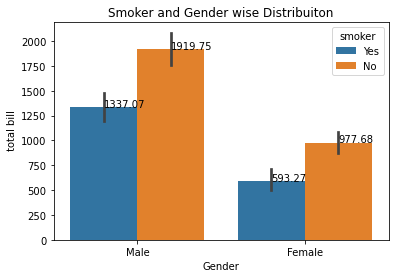

In [139]:
r = sns.barplot(x = 'sex',y = 'total_bill',estimator = sum ,hue = 'smoker',data = df)
r.set_title('Smoker and Gender wise Distribuiton')
r.set_xlabel('Gender')
r.set_ylabel(' total bill')

for q in r.patches:
    height = q.get_height()
    width = q.get_width()
    r.text(x = q.get_x() + width/2,y =height+2 , s = round(height,2))

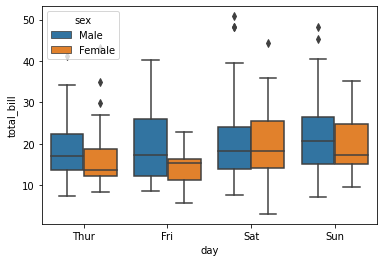

In [140]:
t = sns.boxplot(x = 'day', y = 'total_bill',hue = 'sex',data =df)

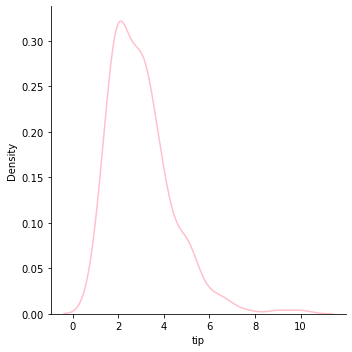

In [144]:
sns.displot(df['tip'],color = 'pink',kind ='kde')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

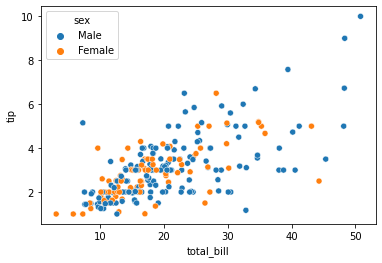

In [145]:
sns.scatterplot(x ='total_bill',y ='tip',hue ='sex',data=df)

In [146]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


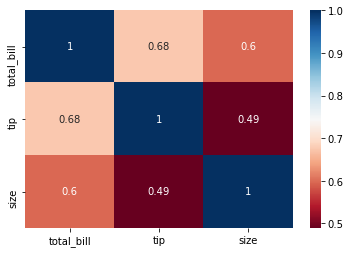

In [160]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot =True,cmap ='RdBu')
plt.savefig('D:/correlation-analysis.jpg')

<Figure size 432x288 with 0 Axes>

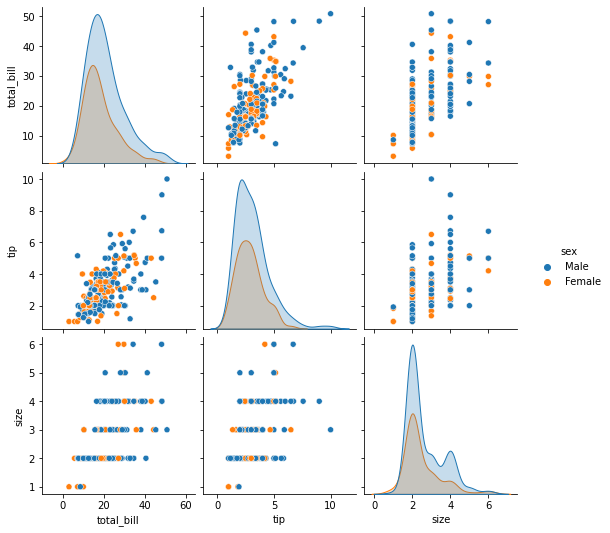

In [162]:
sns.pairplot(df,hue ='sex')

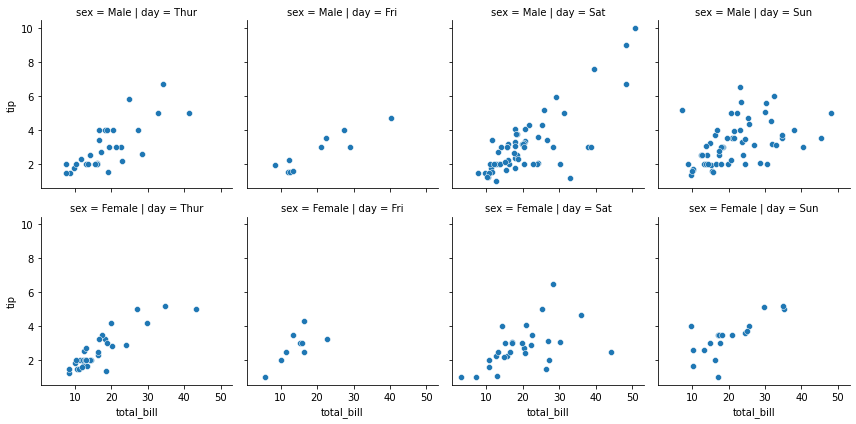

In [163]:
w = sns.FacetGrid(data = df, col ='day', row = 'sex')
w.map(sns.scatterplot,'total_bill','tip')